# Notebook with data visualization to understand skew in the protected attributes and label on german credit data

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from load_data import load_data

### Titanic data (pre-prep)

In [2]:
data = pd.read_csv('/home/luiz/ufpb/mestrado/code/falsb/benchmark/data/german/simpler_german.csv', index_col=0)

In [3]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [4]:
len(data.index)

1000

In [5]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [7]:
original_data = pd.read_csv('/home/luiz/ufpb/mestrado/code/falsb/benchmark/data/german/german.csv', header=None)

In [8]:
original_data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [9]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [10]:
data['Risk'] = original_data[20]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 85.9+ KB


In [12]:
data['Risk'] = data['Risk'].map({1: 1, 2: 0}) # 1 = good -> 1, 2 = bad -> 0

In [13]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


### Viz

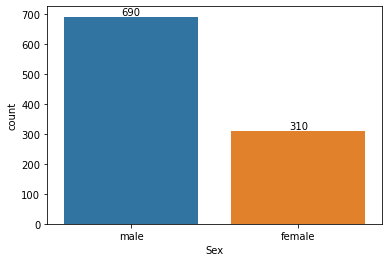

In [14]:
cols = ['Sex', 'count']
sex = ['male', 'female']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['Sex'].value_counts()
train_df = pd.DataFrame(
    data=[
        [sex[0], train_counts[0]],
        [sex[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='Sex',y='count',data=res_df,hue='Sex', dodge=False)
# plt.legend(loc="upper right")
plt.legend([], frameon=False)
plt.show()


In [15]:
data['Risk'].value_counts()

1    700
0    300
Name: Risk, dtype: int64

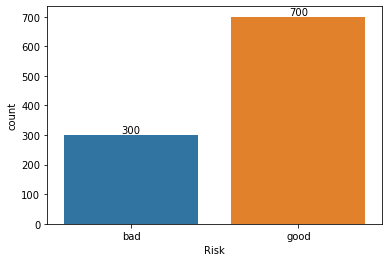

In [16]:
cols = ['Risk', 'count']
risk = ['bad', 'good']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['Risk'].value_counts()
train_df = pd.DataFrame(
    data=[
        [risk[0], train_counts[0]],
        [risk[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='Risk',y='count',data=res_df,hue='Risk', dodge=False)
# plt.legend(bbox_to_anchor=(1.25,1.02), loc="upper right")
plt.legend([], frameon=False)
plt.show()

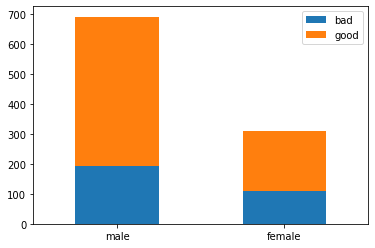

In [17]:
good = data[data['Risk'] == 1]
man_good = len(good[good['Sex'] == 'male'].index)
woman_good = len(good[good['Sex'] == 'female'].index)

bad = data[data['Risk'] == 0]
man_bad = len(bad[bad['Sex'] == 'male'].index)
woman_bad = len(bad[bad['Sex'] == 'female'].index)


res_df = pd.DataFrame(
    {
        'bad': [man_bad, woman_bad],
        'good': [man_good, woman_good],
    },
    index=['male', 'female']
)

res_df.plot(kind='bar', stacked=True)#, color=['red', 'pink'])
plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.show()

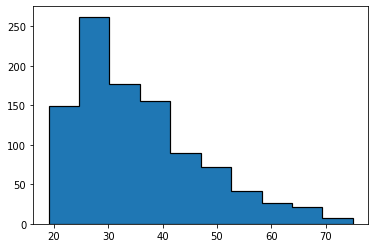

In [18]:
# data['Age'].hist()
plt.hist(data['Age'], histtype="stepfilled", edgecolor='k', linewidth=1.2)
plt.show()

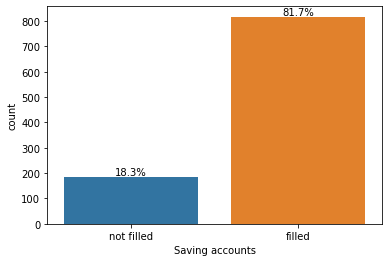

In [19]:
cols = ['Saving accounts', 'count', 'percent']
filled = ['not filled', 'filled']
res_df = pd.DataFrame(columns=cols, dtype='object')

counts_nan = data['Saving accounts'].isna().sum()
count_not_nan = data['Saving accounts'].count().sum()
res_df = pd.DataFrame(
    data=[
        [filled[0], counts_nan, counts_nan/len(data['Saving accounts'].index)],
        [filled[1], count_not_nan, count_not_nan/len(data['Saving accounts'].index)]
    ],
    columns=cols
)

for i in res_df.index:
    percent = np.round(res_df.loc[i, 'percent']*100, 2)
    percent = f'{percent}%'
    y = res_df.loc[i, 'count']
    plt.annotate(percent, (i, y), ha="center", va="bottom")

sns.barplot(x='Saving accounts',y='count',data=res_df,hue='Saving accounts', dodge=False)
# plt.legend(loc="upper right")
plt.legend([], frameon=False)
plt.show()

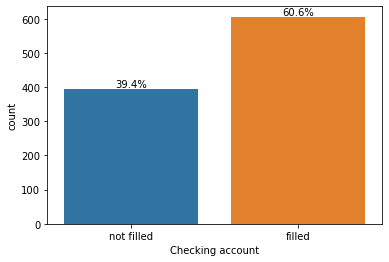

In [20]:
cols = ['Checking account', 'count', 'percent']
filled = ['not filled', 'filled']
res_df = pd.DataFrame(columns=cols, dtype='object')

counts_nan = data['Checking account'].isna().sum()
count_not_nan = data['Checking account'].count().sum()
res_df = pd.DataFrame(
    data=[
        [filled[0], counts_nan, counts_nan/len(data['Checking account'].index)],
        [filled[1], count_not_nan, count_not_nan/len(data['Checking account'].index)]
    ],
    columns=cols
)

for i in res_df.index:
    percent = np.round(res_df.loc[i, 'percent']*100, 2)
    percent = f'{percent}%'
    y = res_df.loc[i, 'count']
    plt.annotate(percent, (i, y), ha="center", va="bottom")

sns.barplot(x='Checking account',y='count',data=res_df,hue='Checking account', dodge=False)
# plt.legend(loc="upper right")
plt.legend([], frameon=False)
plt.show()

In [21]:
size = len(data.index)
size_dropna = len(data.dropna().index)
print(size, size_dropna, size_dropna/size)

1000 522 0.522


### German data (post-prep)

In [22]:
data = pd.read_csv('/home/luiz/ufpb/mestrado/code/falsb/benchmark/data/german/post_prep/german.csv', index_col=0)

In [23]:
data.head()

,Age,Credit amount,Duration,Job_0,Job_1,Job_2,Job_3,Housing_free,Housing_own,Housing_rent,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex,Risk
0,67,0.050567,0.029412,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,22,0.313690,0.647059,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,49,0.101574,0.117647,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,45,0.419941,0.558824,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,53,0.254209,0.294118,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
len(data.index)

1000

In [25]:
data.columns

Index(['Age', 'Credit amount', 'Duration', 'Job_0', 'Job_1', 'Job_2', 'Job_3',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_none',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_none', 'Checking account_rich', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex', 'Risk'],
      dtype='object')

### Viz

In [26]:
data['Sex'].value_counts()

0    690
1    310
Name: Sex, dtype: int64

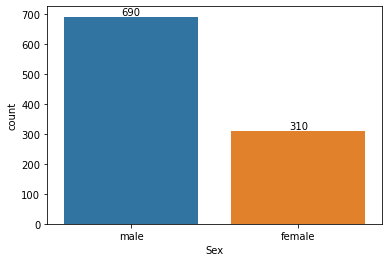

In [27]:
cols = ['Sex', 'count']
sex = ['male', 'female']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['Sex'].value_counts()
train_df = pd.DataFrame(
    data=[
        [sex[0], train_counts[0]],
        [sex[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='Sex',y='count',data=res_df,hue='Sex', dodge=False)
# plt.legend(loc="upper right")
plt.legend([], frameon=False)
plt.show()


In [28]:
data['Risk'].value_counts()

1    700
0    300
Name: Risk, dtype: int64

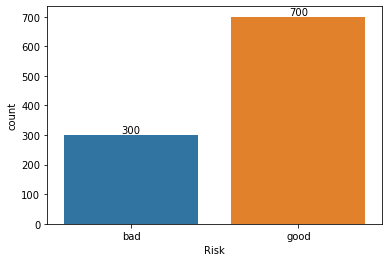

In [29]:
cols = ['Risk', 'count']
risk = ['bad', 'good']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['Risk'].value_counts()
train_df = pd.DataFrame(
    data=[
        [risk[0], train_counts[0]],
        [risk[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='Risk',y='count',data=res_df,hue='Risk', dodge=False)
# plt.legend(bbox_to_anchor=(1.25,1.02), loc="upper right")
plt.legend([], frameon=False)
plt.show()

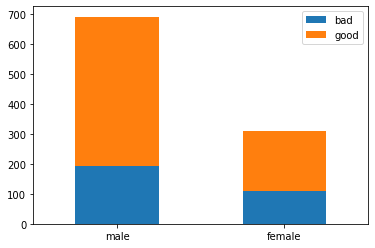

In [30]:
good = data[data['Risk'] == 1]
man_good = len(good[good['Sex'] == 0].index)
woman_good = len(good[good['Sex'] == 1].index)

bad = data[data['Risk'] == 0]
man_bad = len(bad[bad['Sex'] == 0].index)
woman_bad = len(bad[bad['Sex'] == 1].index)


res_df = pd.DataFrame(
    {
        'bad': [man_bad, woman_bad],
        'good': [man_good, woman_good],
    },
    index=['male', 'female']
)

res_df.plot(kind='bar', stacked=True)#, color=['red', 'pink'])
plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.show()

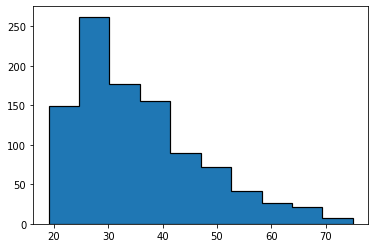

In [31]:
# data['Age'].hist()
plt.hist(data['Age'], histtype="stepfilled", edgecolor='k', linewidth=1.2)
plt.show()